# Outline 

-0. Problem Statemen & Data Collection

-1. Data Description

-2. Portfolio Study

-3. Information subtraction

-4. Predictive modeling  


# 0. Problem Statemen & Data Collection 

This study is trying to explore the market data and market news by using the machine learning and deep learning.  The problem is focusing on predicting and validating the returns from a portfolio of 6 stocks.  

The data in this study include 3 parts:

a. The stocks in the portforlio, including 6 stocks: NASDAQ:AAPL,NASDAQ:ADBE,NASDAQ:ADI,NYSE:A,NYSE:AAP,NYSE:ABBV, and major indexes S&P500, NASDAQ, DJIA.

b. Anohter 454 stocks from NASDAQ and NYSE. The stocks prices are the close prices. 

c. Market news: The historical news headline from  Reddit WorldNews Channel. Top 25 headlines are collected for each day. The dataset are downloaded from Kaggle project https://www.kaggle.com/aaron7sun/stocknews. 



## 0.1 Descriptive Study of the portfolio

The description of the stocks in the portfolio are examined. There are 6 stocks in the fortfolio.The studying period start from 2016-06-27 to 2017-07-01. The description include path of stock price, the return since the beginning and daily change, and the daily changes presented by the taking the log of the ratio. 


In [49]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [85]:
os.chdir("C:/Users/yyang/Dropbox/stock forecasting")

In [176]:
portfolio = pd.read_csv('data\portfolio.csv', parse_dates=True, index_col=0)
#stocks =  pd.read_csv('data\stocks.csv', parse_dates=True, index_col=0)
portfolio.tail()

,SP500,NASDAQCOM,DJIA,NASDAQAAPL,NASDAQADBE,NASDAQADI,NYSEA,NYSEAAP,NYSEABBV
Date,,,,,,,,,
2016-06-27,2000.54,4594.44,17140.24,92.04,90.85,52.55,42.26,153.78,58.68
2016-06-28,2036.09,4691.87,17409.72,93.59,92.46,54.31,43.11,156.98,59.99
2016-06-29,2070.77,4779.25,17694.68,94.40,94.39,55.62,43.76,161.01,61.81
2016-06-30,2098.86,4842.67,17929.99,95.60,95.79,56.64,44.36,161.63,61.91
2016-07-01,2102.95,4862.57,17949.37,95.89,95.32,56.63,44.60,164.33,62.71


In [88]:
share = [0.047619048, 0.095238095,0.142857143,0.19047619,0.238095238,0.285714286]

### Stock Prices



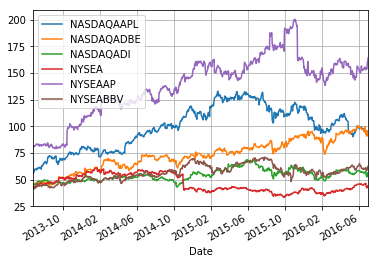

In [89]:
stock_ = ['NASDAQAAPL','NASDAQADBE','NASDAQADI','NYSEA','NYSEAAP','NYSEABBV']
#plot the stock prices over time 
portfolio[stock_].plot(grid = True)

### The stocks return since starting

Look at the return ratio since the the begining of the studying period. 

            NASDAQAAPL  NASDAQADBE  NASDAQADI     NYSEA   NYSEAAP  NYSEABBV
Date                                                                       
2013-06-27    1.000000    1.000000   1.000000  1.000000  1.000000  1.000000
2013-06-28    1.007111    0.991944   0.993167  0.992572  1.014371  0.958498
2013-07-01    1.039289    1.006749   1.000000  1.011838  1.023369  0.964758
2013-07-02    1.062756    1.002177   0.998678  1.000232  1.018120  0.978669
2013-07-03    1.068622    1.010668   1.006833  1.002089  1.024619  0.979133


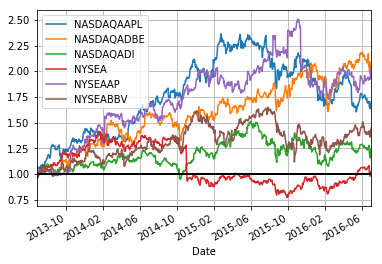

In [90]:
#compare the return over the starting times of the observations 
stock_return = portfolio[stock_].apply(lambda x: x / x[0])
print(stock_return.head())

stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
#comparing to the black line as the starting points

### The change of stock per day

Look the change day by day. The change = x(t)/x(t-1). For compulational efficiency, we take the log and look the change of loged values. 

            NASDAQAAPL  NASDAQADBE  NASDAQADI     NYSEA   NYSEAAP  NYSEABBV
Date                                                                       
2013-06-27         NaN         NaN        NaN       NaN       NaN       NaN
2013-06-28    0.007086   -0.008088  -0.006856 -0.007456  0.014269 -0.042388
2013-07-01    0.031451    0.014815   0.006856  0.019225  0.008831  0.006510
2013-07-02    0.022328   -0.004552  -0.001323 -0.011537 -0.005142  0.014317
2013-07-03    0.005505    0.008437   0.008133  0.001855  0.006362  0.000474


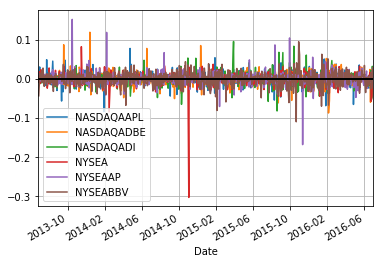

In [91]:
#take the log differences is the percentage of the change 
stock_change = portfolio[stock_].apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
print(stock_change.head())

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)



# 1. Pattern Analysis

To study the pattern of the stocks. Three methods are considered:

>a. Moving Average: used to smooth out stock prices by filtering the noise from the random fluctuations. 

>b. Trend Seasonal Decomposition: The time series is decomposed  as 

>>Series = Level + Trend + Seasonality + Noise

>c. Hodrick Prescott Filter: the filter tries to decompose the series into two components, the shortterm cycle part and the
longterm trend part with function.  It is decomposed as 

>>Series = cycle + trend 


### 1.1  Moving Average 

Take the moving average of the past q stock prices for a dynamic smooth estimate of the trend. The past 20 days and 120 stock prices are smoothed. 

Beside the rolling means, the rolling of standard deviation are also considered. 

#### The rolling means of the moving average

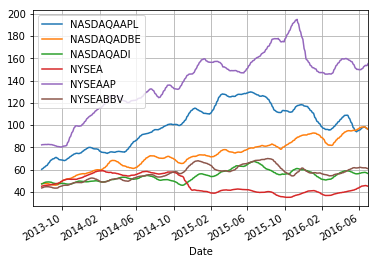

In [92]:
def MA(stock, q):   
    return np.round(stock.rolling(window = q, center = False).mean(), 2)

#past 20 days moving average 
stock_ma = MA(portfolio[stock_], 20)
stock_ma.plot(grid = True)

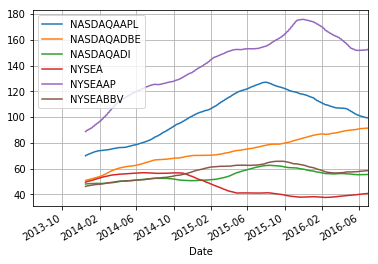

In [594]:
#past 120 days moving average
stock_ma2 = MA(portfolio[stock_], 120)
stock_ma2.plot(grid = True)

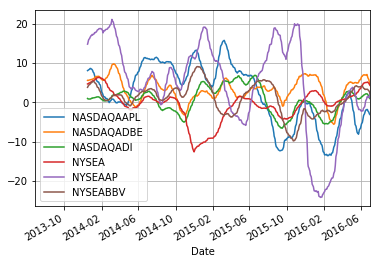

In [94]:
# differences of the actural by the moving average 
diff = stock_ma - stock_ma2
diff.plot(grid = True)

#### rolling standard deviation 

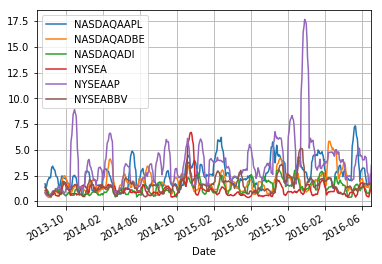

In [95]:
#check the standard deviance of the moving average  
def MA_std(stock, q):   
    return np.round(stock.rolling(window = q, center = False).std(), 2)

stock_ma_std= MA_std(portfolio[stock_], 20)
stock_ma_std.plot(grid = True)


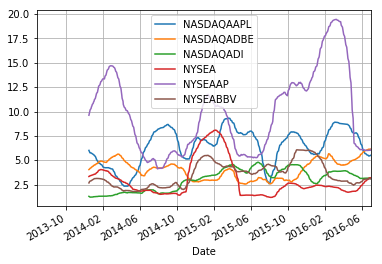

In [96]:
stock_ma_std= MA_std(portfolio[stock_], 120)
stock_ma_std.plot(grid = True)


#### Discussion

Though the 6 stocks have different price values, it is hard to compare directly by the valuses. It is still could be identify that stocks  AAP, AAPL and ADBE have relatively higher fluctuations and more increase trend. 


### 1.2 Trend & Seasonal Decompostion

Decompose the stocks by a additive of tread & seanonality. 



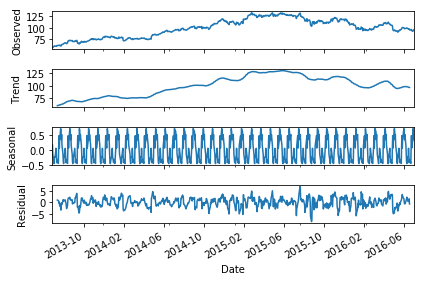

In [577]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decompose for each of the stocks in the portfolio
AAPL_decomp = seasonal_decompose(portfolio.NASDAQAAPL, model='additive', freq = 20)
AAPL_decomp.plot()
plt.show()

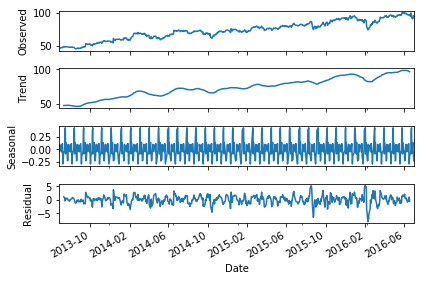

In [98]:
ADBE_decomp = seasonal_decompose(portfolio.NASDAQADBE, model='additive', freq = 20)
ADBE_decomp.plot()
plt.show()

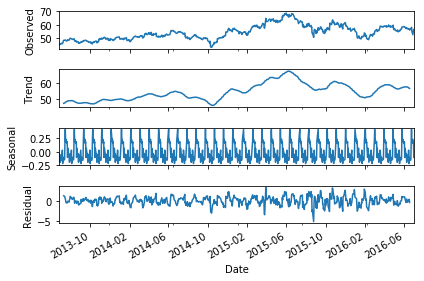

In [99]:
ADI_decomp = seasonal_decompose(portfolio.NASDAQADI, model='additive', freq = 20)
ADI_decomp.plot()
plt.show()

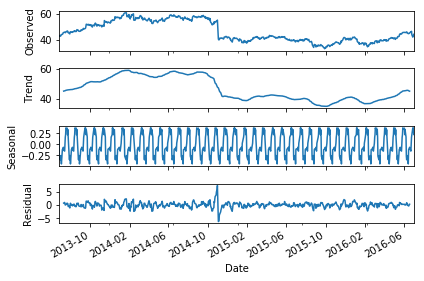

In [100]:
NA_decomp = seasonal_decompose(portfolio.NYSEA, model='additive', freq = 20)
NA_decomp.plot()
plt.show()

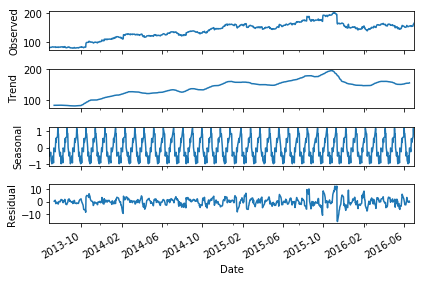

In [101]:
AAP_decomp = seasonal_decompose(portfolio.NYSEAAP, model='additive', freq = 20)
AAP_decomp.plot()
plt.show()

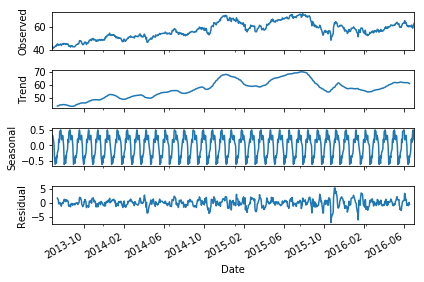

In [582]:
ABBV_decomp = seasonal_decompose(portfolio.NYSEABBV, model='additive', freq = 20)
ABBV_decomp.plot()
plt.show()

#### Discussion

From the trend decomposition, 
stocks AAP, AAPL, ADBE have increase trend;
stocks ADI, ABBV are stable with slightly increase and 
stocks NYSEA have a drop and then keep stable. 

The seasonal trend highly depends on the season. In this case, the trend is not considered since we don’t have too much information about the season information.  

From the noise, stock AAP has higher fluctuations than other stocks, while AAPL, ABDE have relatively smaller noises. 

### 1.3 Trend Estimation via Hodrick Prescott Filter 

In [103]:
import statsmodels.api as sm

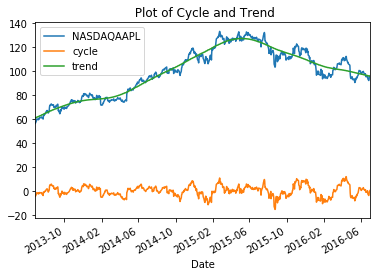

In [104]:
lamb = 1e6
stock_cycle, stock_trend = sm.tsa.filters.hpfilter(portfolio.NASDAQAAPL, lamb = lamb)

AAPL_hpf = pd.DataFrame(portfolio.NASDAQAAPL)
AAPL_hpf['cycle'] = stock_cycle
AAPL_hpf['trend'] = stock_trend

AAPL_hpf.plot( title=' Plot of Cycle and Trend')

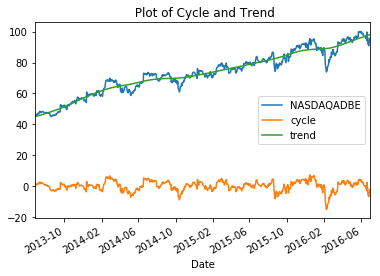

In [597]:
lamb = 1e6
stock_cycle, stock_trend = sm.tsa.filters.hpfilter(portfolio.NASDAQADBE, lamb = lamb)

ADBE_hpf = pd.DataFrame(portfolio.NASDAQADBE)
ADBE_hpf['cycle'] = stock_cycle
ADBE_hpf['trend'] = stock_trend

ADBE_hpf.plot( title=' Plot of Cycle and Trend')

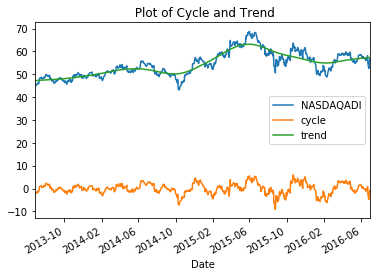

In [106]:
lamb = 1e6
stock_cycle, stock_trend = sm.tsa.filters.hpfilter(portfolio.NASDAQADI, lamb = lamb)

ADI_hpf = pd.DataFrame(portfolio.NASDAQADI)
ADI_hpf['cycle'] = stock_cycle
ADI_hpf['trend'] = stock_trend

ADI_hpf.plot( title=' Plot of Cycle and Trend')

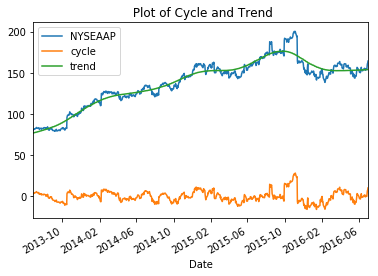

In [107]:
lamb = 1e6
stock_cycle, stock_trend = sm.tsa.filters.hpfilter(portfolio.NYSEAAP, lamb = lamb)

AAP_hpf = pd.DataFrame(portfolio.NYSEAAP)
AAP_hpf['cycle'] = stock_cycle
AAP_hpf['trend'] = stock_trend

AAP_hpf.plot( title=' Plot of Cycle and Trend')

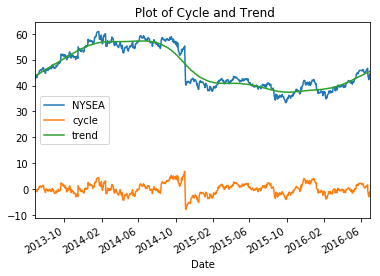

In [108]:
lamb = 1e6
stock_cycle, stock_trend = sm.tsa.filters.hpfilter(portfolio.NYSEA, lamb = lamb)

NYA_hpf = pd.DataFrame(portfolio.NYSEA)
NYA_hpf['cycle'] = stock_cycle
NYA_hpf['trend'] = stock_trend

NYA_hpf.plot( title=' Plot of Cycle and Trend')

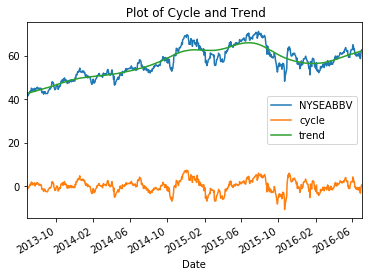

In [109]:
lamb = 1e6
stock_cycle, stock_trend = sm.tsa.filters.hpfilter(portfolio.NYSEABBV, lamb = lamb)

ABBV_hpf = pd.DataFrame(portfolio.NYSEABBV)
ABBV_hpf['cycle'] = stock_cycle
ABBV_hpf['trend'] = stock_trend

ABBV_hpf.plot( title=' Plot of Cycle and Trend')

#### Discussion 

The combined filtered trend are shown in the follow figure. The combined filtered trends are shown in the follow figure. The trend of AAP,  ADBE, AAPL increase a lot and ADI, ABBV have stable increase and NYSEA slightly decrease. 

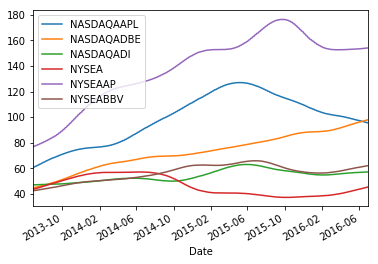

In [608]:
#combine all the trend plots 
HPF = [AAPL_hpf['trend'],  ADBE_hpf['trend'],
          ADI_hpf['trend'], NYA_hpf['trend'],AAP_hpf['trend'], ABBV_hpf['trend']]
trend = pd.concat(HPF, axis = 1)
trend.columns = stock_
trend.plot()

# 2. The Gain/Loss of Portfolio

In this study, the number of stocks in the portfolio are fixed and the return of value portfolio are calculated as a linear combination of the stocks with weight fixed over time.

The volumn of the stock are  
['NASDAQAAPL','NASDAQADBE','NASDAQADI','NYSEA','NYSEAAP','NYSEABBV'] :
[0.0476,  0.0952, 0.1428, 0.1904, 0.2380, 0.2857]

            NASDAQAAPL  NASDAQADBE  NASDAQADI     NYSEA   NYSEAAP  NYSEABBV
Date                                                                       
2013-06-27    0.000000    0.000000   0.000000  0.000000  0.000000  0.000000
2013-06-28    0.019048   -0.035238  -0.044286 -0.060952  0.273810 -0.511429
2013-07-01    0.105238    0.029524   0.000000  0.097143  0.445238 -0.434286
2013-07-02    0.168095    0.009524  -0.008571  0.001905  0.345238 -0.262857
2013-07-03    0.183810    0.046667   0.044286  0.017143  0.469048 -0.257143


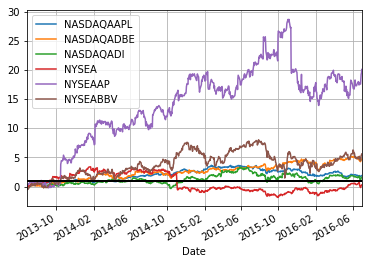

In [609]:
#The absolute return of each stock by comparing to the starting time 
stock_gain = portfolio[stock_].apply(lambda x: x - x[0]) *share 
print(stock_gain.head())
stock_gain.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

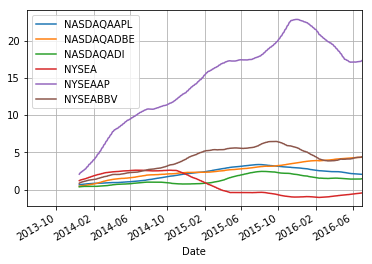

In [611]:
#smoothed return
return_ma = MA(stock_gain, 120)
return_ma.plot(grid = True)

#### Discussion 

Given the portfoliof combinaion, the return (smoothed return) mainly come from the AAP. All the stocks except NYSEA provide longterm gain. 

## 3. Important Factors 

## 3.1 Market News 
The market news are the top 25 headlines from Reddit WorldNews Channel. The  processing steps:

>1. combine all the topics into one copus in a daily basis 

>2. Use TF IDF to vectorize the data vectors.

>3. transform the joined column into a TFIDF sparse matrix

>4. use SVD to perform dimensionality reduction 

Reference: https://www.kaggle.com/aaron7sun/stocknews

In [122]:
news = pd.read_csv('data\Combined_News_DJIA.csv', parse_dates=True, index_col=0)
news.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-27,Ecuador president blasts coverage of Snowden c...,Equador Gets Sassy and Offers U.S. 23 Million ...,The CIA's Plan To Cut Down On Leaks Was Just L...,Ecuador waives U.S. trade rights over Snowden ...,WikiLeaks Volunteer Was a Paid Informant for t...,"""Happy endings"" ruled not illegal in southern ...",Africa's Western Black Rhino is Now Officially...,Additional US data mining revealed by the guar...,"Obama: ""I'm Not Going to Be Scrambling Jets to...",Ecuador waives US trade rights after threats m...,...,Syria: Islamist Rebels Attack Christian Villag...,Outrage over Syrian rebels assaulting catholic...,"Facebook ""Accepted"" but Twitter ""Rejected"" to ...",US wont try to intercept Snowden flights - Obama,"Botswana, the world's largest diamond producer...","""[During] the Cold War, practically every tele...",US boss held captive by Chinese plant workers ...,George Orwell's birthday celebrated in style i...,Japan's public broadcaster sued over use of En...,Report: 36 killed after knife gang attacks Chi...
2013-06-28,Vatican rent-a-boy prostituion ring revealed b...,"Japan's Whaling is Not Science, Expert Witness...",A mysterious Facebook character from Zimbabwe ...,Ecuador's president to U.S.: Don't threaten us...,The former second-highest ranking officer in t...,France: Restaurants selling 'home-made' dishes...,Hundreds protest Obama visit to South Africa,UK set to become the first country to allow th...,Syrian Orthodox Bishop beheaded by Syrian Rebe...,"Five phone hacking defendants, including Rebek...",...,Turkish PM's treason claims against BBC report...,German parliament approves tax equality for ga...,German Chancellor Angela Merkel has warned aga...,"Censorship: U.S. military blocks access to ""Gu...",At least 22 people have been killed after a se...,Kevin Rudd becomes first Australian prime mini...,Cambodian orphans donate to help Alberta flood...,Turkish security forces fire on protest in sou...,Kim Jung Un wants his army to build A Tourist ...,French aid worker Pierre Borghi spent four mon...
2013-07-01,Germany ready to charge UK and US intelligence...,"In 2009, a German politician sued to have 6 mo...",French president demands any US spying cease now,"Germany to ""charge"" UK and USA with spying.",Army estimates 'millions' of protesters on Egy...,Muslim Brotherhood Headquarters Destroyed In E...,"Edward Snowden asking 15 countries for asylum,...",Dutch Rabobank refuses to fund US fracking and...,Afghan soldier defuses suicide vest with terro...,Putin tells Snowden to stop leaking,...,Thousands of Egyptians gather in Tahrir square...,Germany summons US ambassador over 'Cold War' ...,The Oxford grooming ring was promoted by imams...,Hundreds of thousands protest for democracy in...,Russian politician says it would be 'morally i...,"Donald Trump, on trying to build another golf ...","Shotguns, petrol bombs and rocks as protesters...",Japan spends millions in order to be 'Cool'. J...,US Secretary of State John Kerry has responded...,France is top industrial espionage offender ac...
2013-07-02,Statement from Edward Snowden in Moscow,Angry residents in a town in southern Ukraine ...,A teenage actress in Pakistan is in a critical...,"Snowden needs ""world's protection""","Part of 5,000-yr-old pyramid, 1 of oldest in t...",Not a single climate change denial book is pub...,"""If [Snowden] wants to stay here, there is one...","Sex workers, immigrants, and trans-gender bein...",Major banks still involved in money laundering...,Edward Snowden has abandoned his request for p...,...,The European Union has ordered a worldwide sec...,Vatican scandal: The Vatican bank director and...,'Muslims praying in our streets is like the Na...,"Dead Fish Fill Mexico Reservoir - Tens of 1,00...",Copy of Snowden asylum request sent to Polish ...,Ecuador's President Rafael Correa: We helped S...,

In [124]:
#preprocsing the data: combine the topics 
topics = list(news.columns.values)
news['join'] = news[topics].apply(lambda x: ' '.join(x.astype(str)), axis=1)
news1 = news['join']

In [588]:
#TFIDF vectorize the data vectors 
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a tfidf object. Remove english stop words and use 10000 features.
vect = TfidfVectorizer(max_features=10000, stop_words='english')

In [589]:
# Transform the joined column into a tfidf sparse matrix
news_infor = vect.fit_transform(news['join'])
print(news_infor.shape)

(760, 10000)


In [590]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Use tfidf followed by svd is known as lsa or lsi.
svd = TruncatedSVD(150)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

# Apply lsa
news_infor = lsa.fit_transform(news_infor)


In [591]:
news_infor.shape

(760, 150)

In [592]:
#train test split
n = len(news1)
n_train = int(np.floor(n * .8))
new_train = news_infor[:n_train]
new_test = news_infor[n_train:]

## 3.2 Clustering Analysis of Stocks 

The stock market is complicated with many other stocks. In this study, we collect another 454 stocks. The clustering algorithm aim to concentrate the trending of all other time series. 

The clusterning algorithm is realizing via dynamic programming, which optimizes the distance by comparing the pairs of two series' past, current and shifted positions. 

The centroids of the clusters are considered the central of the trends and used to present the whole market trend. 

Referece: http://alexminnaar.com/time-series-classification-and-clustering-with-python.html

In [178]:
stocks =  pd.read_csv('data\stocks_other.csv', parse_dates=True, index_col=0)
stocks.head()

,NASDAQADP,NASDAQADSK,NASDAQAKAM,NASDAQALXN,NASDAQAMAT,NASDAQAMD,NASDAQAMGN,NASDAQAMZN,NASDAQATVI,NASDAQBBBY,...,NYSEWY,NYSEWYN,NYSEXEC,NYSEXEL,NYSEXOM,NYSEXRX,NYSEXYL,NYSEYUM,NYSEZBH,NYSEZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-27,69.37,34.92,42.69,93.79,14.91,4.08,98.99,277.55,14.04,70.15,...,28.20,57.42,65.57,28.70,90.04,36.72,26.63,69.60,74.96,30.87
2013-06-28,68.86,33.94,42.55,92.24,14.92,4.08,98.66,277.69,14.26,70.95,...,28.49,57.23,64.99,28.34,90.35,36.28,26.94,69.34,74.94,30.89
2013-07-01,69.45,33.80,42.97,95.86,14.82,4.10,97.49,282.10,14.28,71.76,...,28.10,57.38,66.37,28.06,90.30,36.96,27.65,70.22,75.00,30.61
2013-07-02,70.08,33.49,42.55,95.35,14.82,3.97,96.06,283.73,14.32,71.46,...,28.54,57.07,67.49,28.13,90.64,36.92,27.50,70.10,76.08,29.70
2013-07-03,70.24,33.49,42.69,96.04,15.00,4.06,95.81,284.03,14.36,71.94,...,28.46,56.83,67.73,28.26,90.69,37.12,27.63,71.12,75.42,29.28


In [177]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])


def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)


import random
def k_means_clust(data,num_clust,num_iter,w=5):
    samp = np.random.choice(len(data), num_clust)
    centroids=data[samp, :]
    counter=0
    for n in range(num_iter):
        counter+=1
        print( counter)
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            #closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
    
        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids



In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stand_stocks = scaler.fit_transform(stocks)
stand_stocks_trans = stand_stocks.transpose()



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


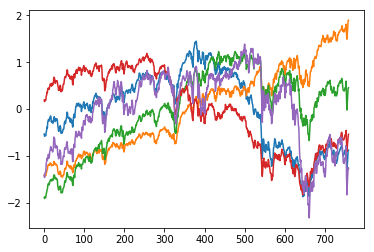

In [180]:
centroids=k_means_clust(stand_stocks_trans,5,20,4)
for i in centroids:   
    plt.plot(i)
plt.show()

In [755]:
centroidT = centroids.T
centroidT.shape

(760, 5)

# 4. Predict the Return of Portfolio

The modeling procedure include:

>1. prepare the data: predicting data include the major indexes, the market trend collecting from the cluster analysis of the market stocks; and the processed market news.

>2. The data are split by the train/test part, prepare data for the RNN model. 

>3. A prediction of return step by step and predict next few steps are calculated.  





## 4.1 Combining Data for Modeling


In [194]:
from sklearn.preprocessing import MinMaxScaler

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
from keras.callbacks import History, TensorBoard
from keras.optimizers import RMSprop,adam

In [252]:
#combine the information for the prediction 
profit =(portfolio[stock_] *share).sum(axis = 1)
profit = np.reshape(profit, (len(profit), 1))
scaler_profit = MinMaxScaler(feature_range=(0, 1))
profit = scaler_profit.fit_transform(profit)

portfolio['profit'] =  profit


In [196]:
portfolio.head()

,SP500,NASDAQCOM,DJIA,NASDAQAAPL,NASDAQADBE,NASDAQADI,NYSEA,NYSEAAP,NYSEABBV,profit
Date,,,,,,,,,,
2013-06-27,1613.20,3401.86,15024.49,56.25,45.93,45.37,43.08,80.02,43.13,0.008280
2013-06-28,1606.28,3403.25,14909.60,56.65,45.56,45.06,42.76,81.17,41.34,0.000000
2013-07-01,1614.96,3434.49,14974.96,58.46,46.24,45.37,43.59,81.89,41.61,0.013880
2013-07-02,1614.08,3433.40,14932.41,59.78,46.03,45.31,43.09,81.47,42.21,0.014121
2013-07-03,1615.41,3443.67,14988.55,60.11,46.42,45.68,43.17,81.99,42.23,0.019897


In [197]:
#The dependent variable is the profit
#scale the major indexes by constant 
indx = portfolio[['profit', 'SP500', 'NASDAQCOM', 'DJIA' ]]
#scale the index to around 1 
indx.SP500 = indx.SP500/2000
indx.NASDAQCOM = indx.NASDAQCOM/5000
indx.DJIA = indx.DJIA/20000
indx = np.array(indx)

In [213]:
#combine the indexs and the centroid of stocks 
indx2= np.concatenate((indx, centroidT), axis = 1)

## 4.2 Create Dataset for Training and Testing

>a. The training and testing are split by 80% and 20%. 

>b. In each time points, the past two time points are used as the input in each step. 

In [202]:
##train test split 
train_size = int(len(indx2) * 0.80)
test_size = len(indx2) - train_size
train0= indx2[0:train_size, :]
test0 = indx2[train_size:, :]


In [225]:
##combine the text information 
train = np.concatenate((train0,newsTrainPCA ), axis = 1)
test = np.concatenate((test0, newsTestPCA ), axis = 1)

In [230]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)



In [743]:
look_back = 2
trainX, trainY = create_dataset(train[:, :4],  look_back=look_back)
testX, testY = create_dataset(test[:, :4],  look_back=look_back)

In [744]:
print(trainX.shape)
print(trainX[:2, :, :])

(605, 2, 4)
[[[0.00827953 0.8066     0.680372   0.7512245 ]
  [0.         0.80314    0.68065    0.74548   ]]

 [[0.         0.80314    0.68065    0.74548   ]
  [0.01387974 0.80748    0.686898   0.748748  ]]]


## 4.3 Model Structure and Fitting

A RNN model with two layer of the LSTM, with dimensions (4, 50) and (100, 1). Dropout probabilities in each layer are set to be 0.2.  

In [745]:
####################################
# model structure
np.random.seed(1)
# Store some history
history = History()
model = Sequential()


model.add(LSTM(
    input_dim=4,
    output_dim=50,
    return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))

model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop') # rmsprop, adam, adagrad 


In [746]:
model.fit(
    trainX,
    trainY,
#    batch_size=200,
    validation_data=(testX, testY),
    nb_epoch= 50,
   callbacks=[history]
)

Train on 605 samples, validate on 149 samples
Epoch 1/50
605/605 [==============================] - 3s - loss: 0.1052 - val_loss: 0.0043
Epoch 2/50
605/605 [==============================] - 0s - loss: 0.0336 - val_loss: 0.0068
Epoch 3/50
605/605 [==============================] - 0s - loss: 0.0201 - val_loss: 0.0014
Epoch 4/50
605/605 [==============================] - 0s - loss: 0.0092 - val_loss: 0.0027
Epoch 5/50
605/605 [==============================] - 0s - loss: 0.0059 - val_loss: 0.0033
Epoch 6/50
605/605 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0027
Epoch 7/50
605/605 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0137
Epoch 8/50
605/605 [==============================] - 0s - loss: 0.0065 - val_loss: 0.0013
Epoch 9/50
605/605 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0123
Epoch 10/50
605/605 [==============================] - 0s - loss: 0.0061 - val_loss: 0.0037
Epoch 11/50
605/605 [======================

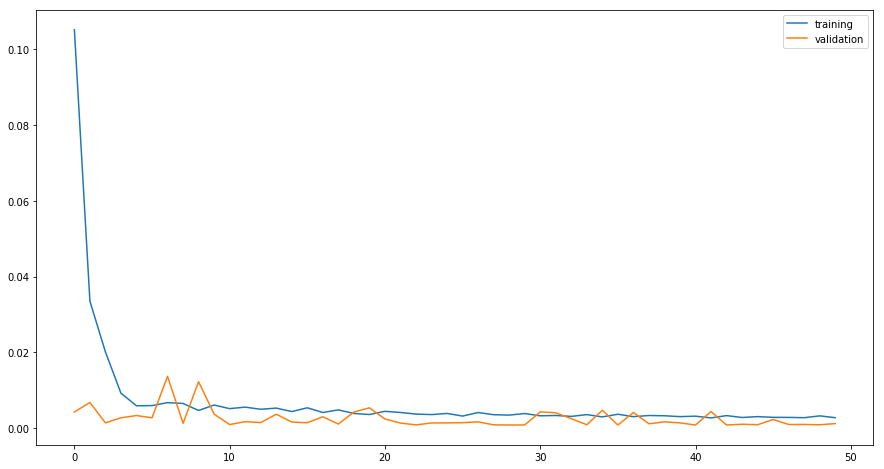

In [747]:
#check the loss function of training data and validation data
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'],    label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()


## 4.3 Results 

### Predict with one step ahead 


In [748]:
#ont step prediction 
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [749]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler_profit.inverse_transform(trainPredict)
trainY = scaler_profit.inverse_transform([trainY])
testPredict = scaler_profit.inverse_transform(testPredict)
testY = scaler_profit.inverse_transform([testY])


In [750]:
import math 
from sklearn.metrics import mean_squared_error

# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))


Train RMSE: 1.31
Test RMSE: 1.51


In [751]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(profit)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(profit)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(profit)-1, :] = testPredict



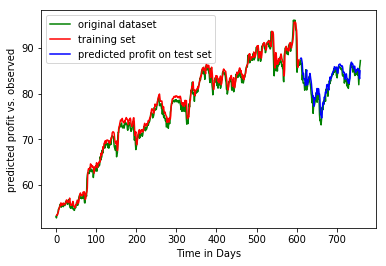

In [752]:
# DE-NORMALIZING MAIN DATASET 
Profit = scaler_profit.inverse_transform(profit)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(Profit, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted profit on test set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('predicted profit vs. observed')
plt.show()

### Prediction with several step ahead 

In [753]:
from numpy import newaxis

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()


def predict_sequences_multiple(model, data, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, 0, predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

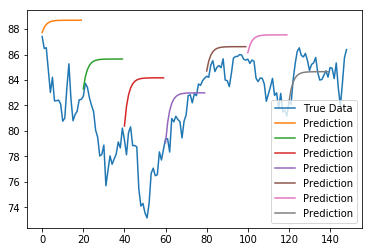

In [754]:
predic_mult = predict_sequences_multiple(model, testX, 20)   
predictions = scaler_profit.inverse_transform(predic_mult).tolist()
plot_results_multiple(predictions, testY.T, 20)

# 5. Discussion 

## 5.1  The Model Features 

In the modeling procedures, all the variables are included at first. But the in the final model, only the indexes are used to predict the profits. The variable chose depends on the purpose and relative importance to the estimates. In this case, the training period is short and a simple model is preferred. The market news are not quite related to the stocks and the other stocks’ trends might not influence the prediction, and thus excluded from the final model. 

## 5.2  The Modeling Layers and Parameter Tuning

The stock market is complicated and the choose of modeling layers depends on the purpose of the modeling.  For a short-term prediction purpose, the most recent values are more important and should only be included in the input of each step.  The training size is about 600, and the parameters in each of the layer should not be too large. The parameter tuning is based on gridded search, including the input data steps, and parameters in each layer. 

## 5.3 The Prediction Discussion 

The step by step prediction is much easier than the long time prediction. The from the plot of the one step prediction the prediction on the training and testing are very close. But if use the current price to predict the price after 20 days, the predictions have relative high bias because the model could not capture the longtime trend of stock market. 

## 5.4 The Lessons Learning 

From the descriptive study perspective, trend and the scale values of stocks should be studied more thoroughly to have a prediction of the overall trend and might be useful for the latter prediction of the portfolio. 

From the data collection prospective. Informative data collections are quite important for the prediction, especially for deep learning models. The Neural Network could be easily overfitting comparing to other tree based machine learning algorithms, and thus data used for the modeling should be pre-studied to for variable selection first. 

From the model structure, the deep learning models could be very complicated and the tuning of the parameters is not easy. For illustration purpose, input data and model structure are very simple in this case. For more complicated model, instead of the daily stock prices, the hourly information could be used.  Moreover, the market news should be related to the targeted stocks to increase the prediction purpose. Besides, more layers or more nodes in each layer could be considered when more data are collected in the model. 

Last, in this problem, only the fixed volume of stocks is considered, more study could consider with dynamic change the volumes. 
